## Exploratory Data Analysis-10
https://drive.google.com/file/d/1afLkuTgMtOpnMBV_vzjtS3-9AbwfSwFI/view?usp=share_link

In [ ]:
# # Shape of the dataset
# df.shape

# # Checking noise values
# for i in df.columns:
#     print(i,'\n', df[i].sort_values().unique())
    
# # Checking null values
# df.isnull().sum()

# # Checking duplicates
# df[df.duplicated()==True]

# # Checking data types
# df.dtypes

# # 5-point summary
# df.describe()

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the dataset
df=pd.read_csv('E:/Exploratory_Data_Analysis/EDA_10_SummerOlympics.csv')

In [4]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
df.shape

(31165, 9)

In [ ]:
# 1.	Deal with the null, noise, and duplicate values in the dataset. 
#     Do not drop the null values instead fill it up with the appropriate values. 
#     Also, find the 5-point summary of all the numerical columns.

In [6]:
# Null values
df.isnull().sum()
df['Country']=df['Country'].fillna(df['Country'].mode()[0])

In [ ]:
# Noise values
for i in df.columns:
    print(i, '\n', df[i].sort_values().unique())

In [7]:
# Duplicate records
df[df.duplicated()==True]
df.drop_duplicates(inplace=True)

In [8]:
# Data types
df.dtypes

Year           int64
City          object
Sport         object
Discipline    object
Athlete       object
Country       object
Gender        object
Event         object
Medal         object
dtype: object

In [9]:
# 5-point summary
df.describe()

,Year
count,31163.000000
mean,1970.481148
std,33.158602
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [7]:
# 2.	Standardize all column headers to lowercase. (” Year” will become ‘year’ and so on). 
#     Don’t do it manually for all the columns.

for i in df.columns:
    name=i.lower().strip()
    df.rename(columns={i:name}, inplace=True)

In [15]:
# 3.	Find the unique values in all the columns at once.

for i in df.columns:
    print(i,'--->', df[i].nunique())

year ---> 27
city ---> 22
sport ---> 43
discipline ---> 67
athlete ---> 22762
country ---> 147
gender ---> 2
event ---> 666
medal ---> 3


In [29]:
# 4.	Do the analysis to represent the top 10 countries that won the most medals in the Summer Olympics. 
#     Visualize it with the help of a chart.

x4=df['country'].value_counts().reset_index()
x4.columns=['Country', 'Total_Medals']
res4=x4.sort_values('Total_Medals', ascending=False).head(10)
res4

,Country,Total_Medals
0,USA,4589
1,URS,2049
2,GBR,1720
3,FRA,1396
4,GER,1305
5,ITA,1296
6,AUS,1189
7,HUN,1079
8,SWE,1044
9,NED,851


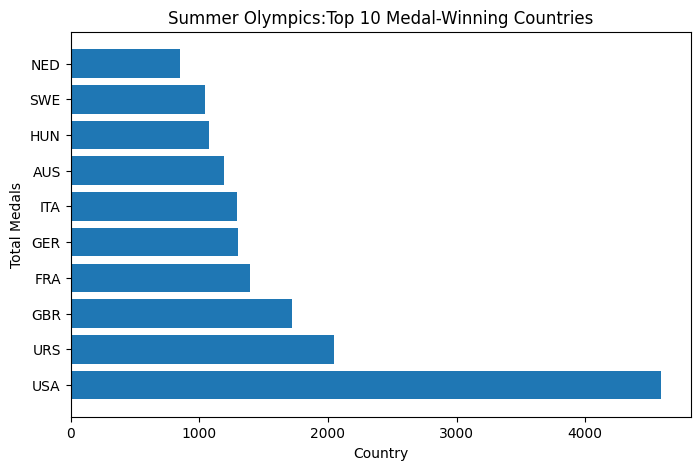

In [33]:
# Bar chart
plt.figure(figsize=(8,5))
plt.barh(res4['Country'], res4['Total_Medals'])
plt.title('Summer Olympics:Top 10 Medal-Winning Countries')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.show()

In [66]:
# 5.	Create a visualization to show the event with the most weighted medal count. 
#     Consider the weights of the Gold, Silver, and Broze medals to be 0.5,0.35 and 0.15

weights = {'Gold': 0.5, 'Silver': 0.35, 'Bronze': 0.15}
df['Medal_wt'] = df['medal'].map(weights)

x5=df.groupby('event')['Medal_wt'].sum().reset_index()
res5=x5.sort_values('Medal_wt', ascending=False).head()
#res5=x5[x5['Medal_wt']==x5['Medal_wt'].max()]
res5

,event,Medal_wt
477,Football,497.6
489,Hockey,478.3
614,Team Competition,387.5
403,Basketball,338.7
483,Handball,324.1


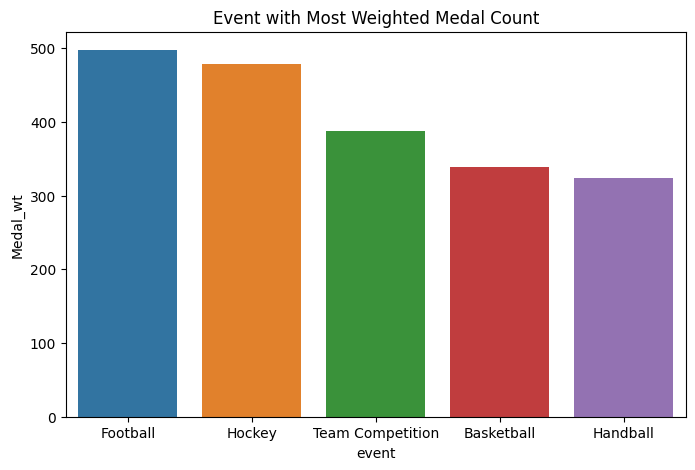

In [67]:
# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(res5, x=res5['event'], y=res5['Medal_wt'])
plt.title('Event with Most Weighted Medal Count')
plt.show()

In [77]:
# 6.	Plot a chart to show the top 10 disciplines with the most gold medals.

x6=df[df['medal']=='Gold']
x6=x6['discipline'].value_counts().reset_index()
x6.columns=['discipline','Gold_medal_cnt']
res6=x6.sort_values('Gold_medal_cnt', ascending=False).head(10)
res6

,discipline,Gold_medal_cnt
0,Athletics,1215
1,Swimming,901
2,Rowing,890
3,Artistic G.,752
4,Fencing,552
5,Football,503
6,Hockey,485
7,Sailing,412
8,Shooting,384
9,Basketball,342


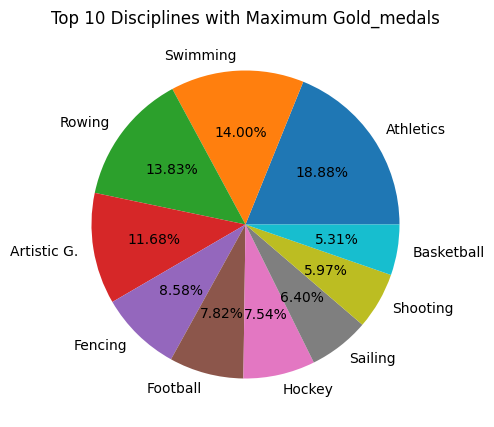

In [86]:
# Pie chart
plt.figure(figsize=(8,5))
plt.pie(res6['Gold_medal_cnt'], labels=res6['discipline'], autopct='%1.2f%%')
plt.title('Top 10 Disciplines with Maximum Gold_medals')
plt.show()

In [137]:
# 7.	Create a table to show the different sports and the year in which it was first played in the Olympics.

x7=df.groupby('sport')['year'].min().reset_index()
x7.columns=['sport', 'First_Played']
res7=x7.sort_values('First_Played')
res7.head()

,sport,First_Played
0,Aquatics,1896
36,Tennis,1896
31,Shooting,1896
41,Weightlifting,1896
17,Gymnastics,1896


In [98]:
# Group concat year wise
year_sports = res7.groupby('First_Played')['sport'].apply(lambda x: ', '.join(x)).reset_index()
year_sports.columns=['Year','Sports Played']
year_sports

,Year,Sports Played
0,1896,"Aquatics, Tennis, Shooting, Weightlifting, Gym..."
1,1900,"Polo, Rowing, Rugby, Sailing, Archery, Footbal..."
2,1904,"Roque, Lacrosse, Boxing"
3,1908,"Skating, Water Motorsports, Jeu de paume, Hock..."
4,1912,Modern Pentathlon
5,1920,Ice Hockey
6,1936,"Handball, Basketball, Canoe / Kayak"
7,1964,"Judo, Volleyball"
8,1988,Table Tennis
9,1992,"Badminton, Baseball"


In [102]:
# 8.	How many unique sports do we have thus far, in Summer Olympics?
df['sport'].nunique()
len(df['sport'].unique())

43

In [138]:
# 9.	What is the number of Sports held per year in Summer Olympics, since 1896? 
#     Create a bar chart to show the same. Also, change the palette of bar plot to “summer” and saturation to “0.7”.

# x9=df.groupby(['year', 'sport']).size().reset_index()
# x9.columns = ['Year', 'Sport', 'Count']
# x9

x9=df['year'].value_counts().reset_index()
x9.columns = ['Year', 'No_of_sports']
res9=x9.sort_values('Year')
res9.head()

,Year,No_of_sports
26,1896,151
24,1900,512
25,1904,470
21,1908,804
15,1912,885


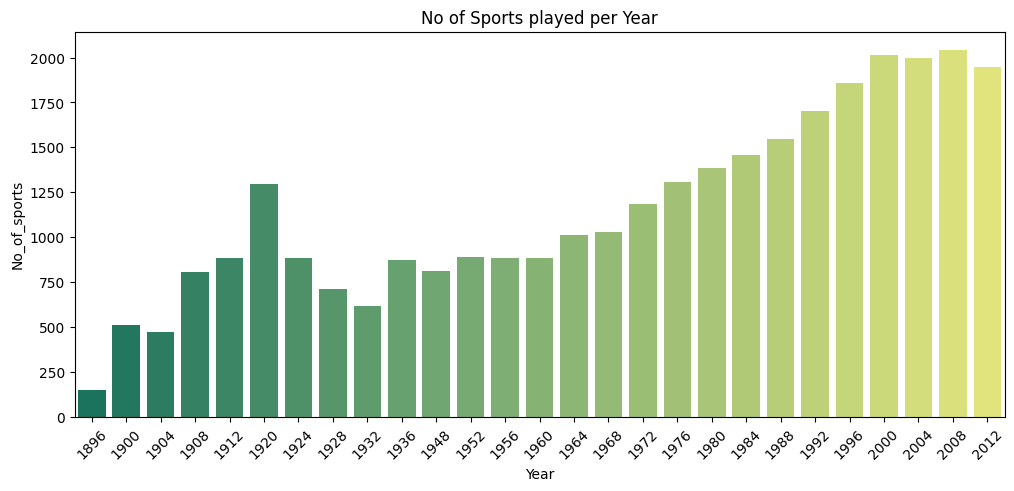

In [126]:
# Bar plot
plt.figure(figsize=(12,5))
sns.barplot(res9, x='Year', y='No_of_sports', palette='summer', saturation=0.7)
plt.title('No of Sports played per Year')
plt.xticks(rotation=45)
plt.show()

In [136]:
# 10.	How is gender participation in Summer Olympics, since 1896? 
#     Create a 100% stacked bar plot to show the percentage of men and women in each year’s Olympics.

x10=df.groupby(['year', 'gender']).size().reset_index(name='Count')
res10=x10.sort_values('year')
res10.head()

,year,gender,Count
0,1896,Men,151
1,1900,Men,501
2,1900,Women,11
3,1904,Men,458
4,1904,Women,12


In [142]:
# Creating a pivot table for the 100% stacked bar chart
res10 = x10.pivot(index='year', columns='gender', values='Count')

# Percentage for each gender
res10_per = res10.div(res10.sum(axis=1), axis=0)*100
res10_per.head()

gender,Men,Women
year,,
1896,100.000000,NaN
1900,97.851562,2.148438
1904,97.446809,2.553191
1908,98.134328,1.865672
1912,96.610169,3.389831


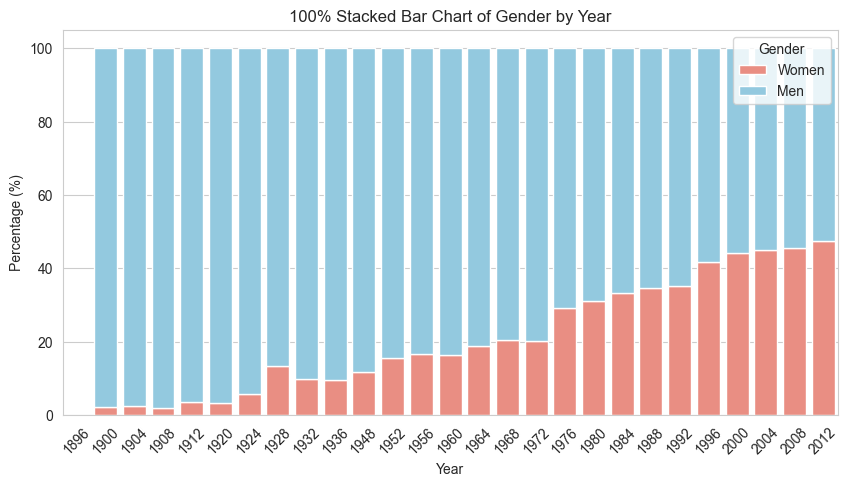

In [151]:
# 100% stacked bar chart
plt.figure(figsize=(10, 5))
sns.barplot(res10_per, x=res10_per.index, y=res10_per['Women'], color='salmon', label='Women')
sns.barplot(res10_per, x=res10_per.index, y=res10_per['Men'], color='skyblue', bottom=res10_per['Women'], label='Men')
plt.title('100% Stacked Bar Chart of Gender by Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

In [152]:
# 11.	How many cities hosted the Summer Olympics games, since 1896?
df['city'].nunique()

22

In [163]:
# 12.	How many cities in which the Olympics was conducted more than once?

x12=df.groupby('city')['year'].nunique().reset_index()
x12.columns=['City','Year_count']
res12=x12[x12['Year_count']>1]
#res12.shape[0]
len(res12)

4

In [185]:
# 13.	Which country won the most gold medals, in each of the Olympics?           ---Important---

gold_df=df[df['medal']=='Gold']

x13=gold_df.groupby(['year', 'country'])['medal'].count().reset_index()
x13.columns=['Year', 'Country', 'Gold Medal Count']

res13=x13.loc[x13.groupby('Year')['Gold Medal Count'].idxmax()]
res13.sort_values('Year')
res13.head()

,Year,Country,Gold Medal Count
5,1896,GER,26
18,1900,GBR,48
32,1904,USA,146
39,1908,GBR,144
61,1912,SWE,86


In [192]:
# 14.	How many medals were won by women in Summer Olympics each year?

female_medal=df[df['gender']=='Women']

x14=female_medal.groupby('year')['medal'].count().reset_index()
x14.columns=['Year','Medal_won_by_women']
x14.head()

,Year,Medal_won_by_women
0,1900,11
1,1904,12
2,1908,15
3,1912,30
4,1920,43


In [205]:
# 15.	Top 5 countries to win most gold medals across all seasons collectively.

gold_df=df[df['medal']=='Gold']

x15=gold_df.groupby('country')['medal'].count().reset_index()
x15.columns=['Country','Gold_medal_cnt']

res15=x15.sort_values('Gold_medal_cnt', ascending=False)
res15.head()

,Country,Gold_medal_cnt
93,USA,2237
91,URS,838
34,GBR,546
47,ITA,476
37,GER,452


In [215]:
# 16.	Create a function that takes the year as input and provides the top 5 countries to win the 
#     most gold medals in that year as an output. Also, plot a category plot for the same.

def top5_country_by_gold_medal(df, year):
    gold_df=df[(df['medal']=='Gold') & (df['year']==year)]
    
    x16=gold_df.groupby('country')['medal'].count().reset_index()
    x16.columns=['Country','Gold_medal_cnt']
    
    res16=x16.sort_values('Gold_medal_cnt',  ascending=False)
    return res16.head()

In [218]:
top5_country_by_gold_medal(df,2012)

,Country,Gold_medal_cnt
52,USA,149
8,CHN,55
18,GBR,48
41,RUS,47
20,GER,45


In [223]:
# 17.	Create a data frame to show the Disciplines with the greatest number of Gold Medals.

gold_df=df[df['medal']=='Gold']

x17=gold_df.groupby('discipline')['medal'].count().reset_index()
x17.columns=['discipline','Gold_medal_cnt']

res17=x17.sort_values(by='Gold_medal_cnt', ascending=False)
res17.head()

,discipline,Gold_medal_cnt
2,Athletics,1215
49,Swimming,901
44,Rowing,890
1,Artistic G.,752
23,Fencing,552


In [237]:
# 18.	How is the variation of Male Athletes over time? Create a line plot to show the variation.

filter_df=df[df['gender']=='Men']

x18=filter_df.groupby('year')['athlete'].count().reset_index()
x18.columns=['Year','Athlete_count']

res18=x18.sort_values(by='Year')
res18.head()

,Year,Athlete_count
0,1896,151
1,1900,501
2,1904,458
3,1908,789
4,1912,855


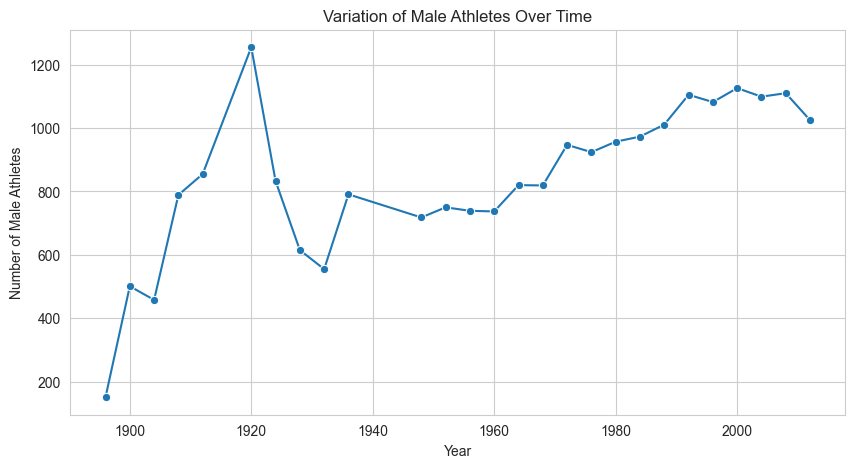

In [240]:
# Line plot
plt.figure(figsize=(10,5))
#plt.plot(res18['Year'], res18['Athlete_count'], marker='o', linestyle='-')
sns.lineplot(res18, x='Year', y='Athlete_count', marker='o', linestyle='-')
plt.title('Variation of Male Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Male Athletes')
plt.show()

In [247]:
# 19.	How has the number of athletes’ participation varied over time? Create a clustered column chart to show it for both genders.

x19=df.groupby(['year','gender'])['athlete'].count().reset_index()
x19.columns=['Year','Gender' ,'Athlete_count']

res19=x19.sort_values(by='Year')

res19 = res19.pivot(index='Year', columns='Gender', values='Athlete_count')
res19.head()

Gender,Men,Women
Year,,
1896,151.0,NaN
1900,501.0,11.0
1904,458.0,12.0
1908,789.0,15.0
1912,855.0,30.0


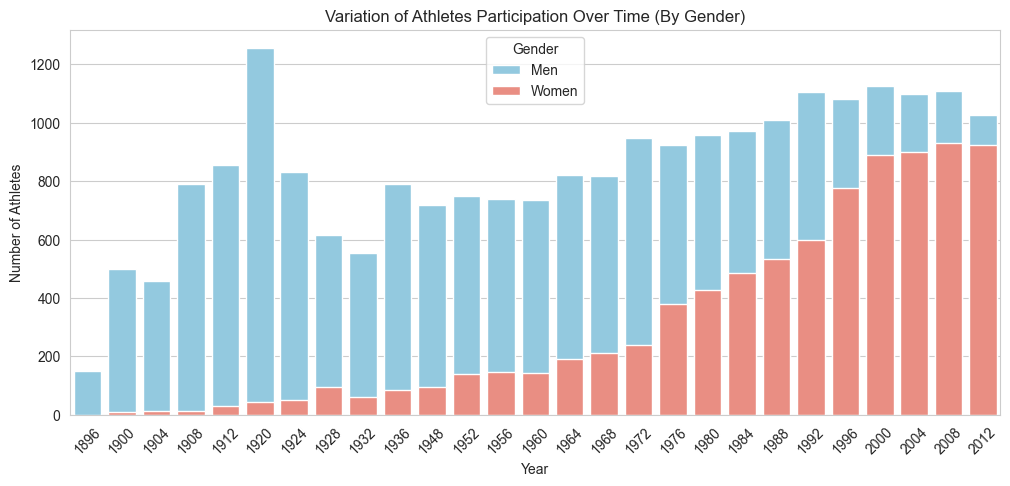

In [253]:
# Cluster Column chart -over stacked

plt.figure(figsize=(12, 5))
sns.barplot(res19, x=res19.index, y='Men', color='skyblue', label='Men')
sns.barplot(res19, x=res19.index, y='Women', color='salmon', label='Women')
plt.title('Variation of Athletes Participation Over Time (By Gender)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

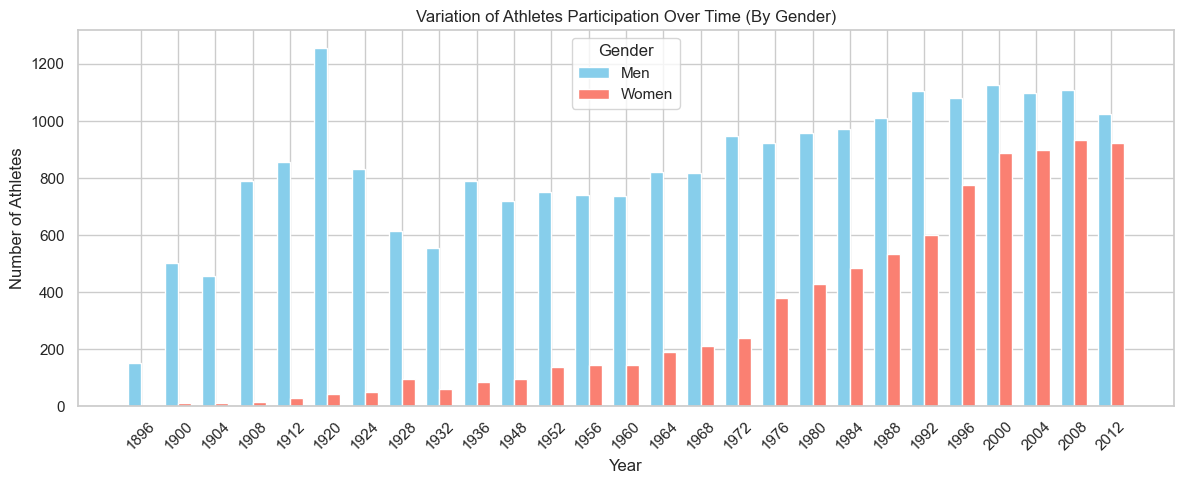

In [260]:
# Cluster Column chart -side stacked

# Extract the number of male and female athletes
male_counts = res19['Men']
female_counts = res19['Women']
bar_width=0.35

# Calculate the positions of bars for male and female athletes
male_positions = np.arange(len(res19.index))
female_positions = male_positions + bar_width

# Create the clustered column chart
plt.figure(figsize=(12, 5))
plt.bar(male_positions, male_counts, bar_width, label='Men', color='skyblue')
plt.bar(female_positions, female_counts, bar_width, label='Women', color='salmon')
plt.title('Variation of Athletes Participation Over Time (By Gender)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(male_positions + bar_width/2, years, rotation=45) 
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [9]:
# 20.	How is the distribution of athletes, sports, and events varies across each Summer Olympics? 
#     Create subplots that show the distribution.

athletes_counts = df.groupby('year')['athlete'].nunique()
sports_counts = df.groupby('year')['sport'].nunique()
events_counts = df.groupby('year')['event'].nunique()

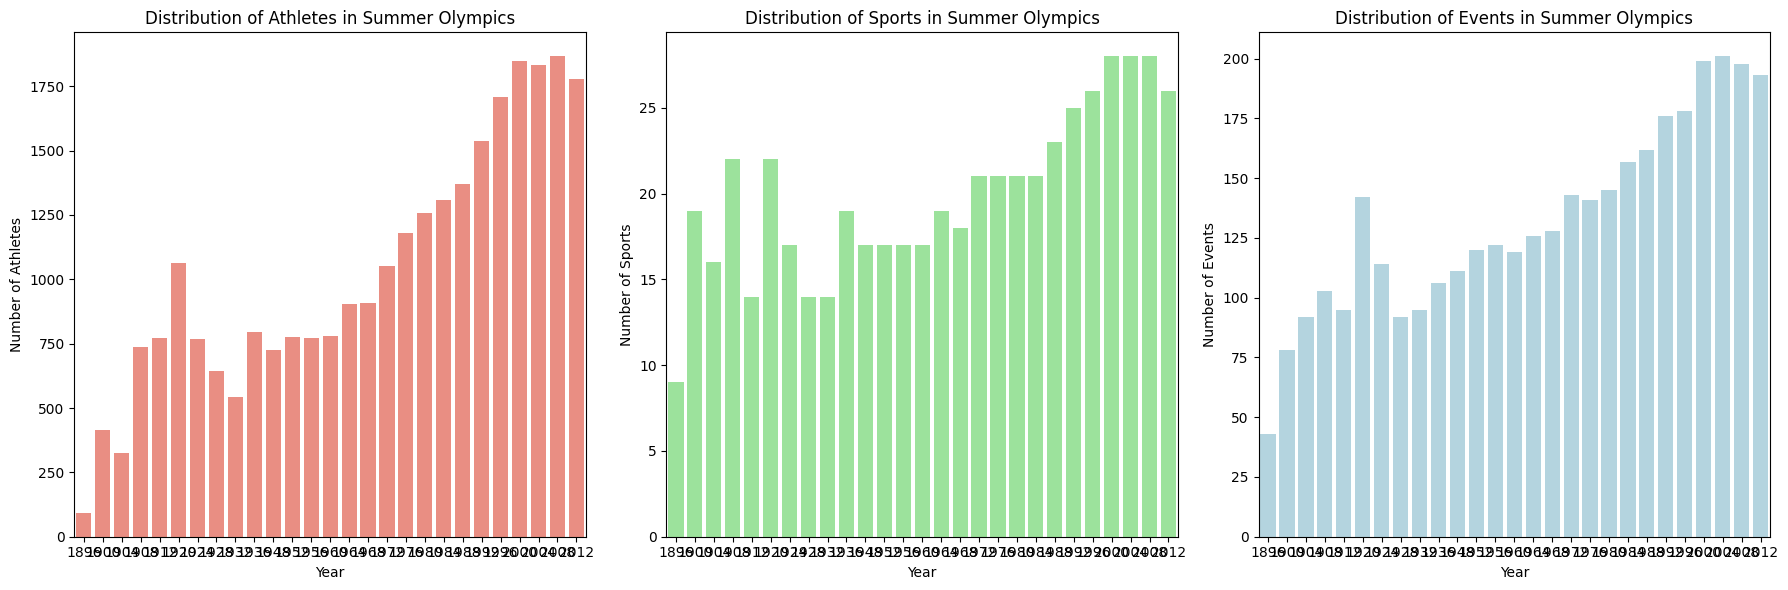

In [10]:
# Create subplots in one row and three columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Distribution of Athletes
sns.barplot(x=athletes_counts.index, y=athletes_counts.values, color='salmon', ax=axes[0])
axes[0].set_title('Distribution of Athletes in Summer Olympics')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Athletes')

# Plot 2: Distribution of Sports
sns.barplot(x=sports_counts.index, y=sports_counts.values, color='lightgreen', ax=axes[1])
axes[1].set_title('Distribution of Sports in Summer Olympics')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Sports')

# Plot 3: Distribution of Events
sns.barplot(x=events_counts.index, y=events_counts.values, color='lightblue', ax=axes[2])
axes[2].set_title('Distribution of Events in Summer Olympics')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Number of Events')

plt.tight_layout()
plt.show()

In [43]:
df.head(2)

,year,city,sport,discipline,athlete,country,gender,event,medal,Medal_wt
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,0.50
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,0.35


In [8]:
df.columns

Index(['year', 'city', 'sport', 'discipline', 'athlete', 'country', 'gender',
       'event', 'medal'],
      dtype='object')